In [1]:
import os 
os.chdir('../baseline-pretraining')

%load_ext autoreload
%autoreload 2

In [2]:
from src.babylm_baseline_train.datasets.babyLM import get_babyLM_10M, BabyLM
import matplotlib.pyplot as plt

/home/misra/anaconda3/envs/babylm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
babylm_10M = BabyLM()
babylm_10M.get_dataset()

Found cached dataset baby_lm_for_hf (/home/misra/.cache/huggingface/datasets/baby_lm_for_hf/babyLM-10M/1.0.0/281c1a7c3ebf0b682e9bdca60f4a2442b6aaf2d2a266fea843461e98f10a5f07)


In [4]:
type(babylm_10M.dataset)

datasets.arrow_dataset.Dataset

In [5]:
babylm_10M.dataset._info

DatasetInfo(description='BabyLM data\n', citation='\n', homepage='https://babylm.github.io/', license='????', features={'text': Value(dtype='string', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='baby_lm_for_hf', config_name='babyLM-10M', version=1.0.0, splits={'test': SplitInfo(name='test', num_bytes=61183993, num_examples=1054646, shard_lengths=None, dataset_name='baby_lm_for_hf'), 'validation': SplitInfo(name='validation', num_bytes=56079395, num_examples=1026747, shard_lengths=None, dataset_name='baby_lm_for_hf'), 'train': SplitInfo(name='train', num_bytes=58818438, num_examples=1058740, shard_lengths=None, dataset_name='baby_lm_for_hf')}, download_checksums={}, download_size=0, post_processing_size=None, dataset_size=176081826, size_in_bytes=176081826)

In [6]:
babylm_10M.dataset['text'][30]

'look at that .\n'

In [23]:
babylm_10M.dataset['text'][-5678]

'\tMDDE incorporated in the State of Maryland on June 20, 1977 as a closely held, small railroad company. At that time, the states of Maryland and Delaware were paying subsidies to Conrail for branch lines, still owned by Penn Central, serving rural communities.\n'

In [12]:
print('num examples: ', len(babylm_10M.dataset))

num examples:  1058740


In [25]:
df = babylm_10M.dataset.to_pandas()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058740 entries, 0 to 1058739
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1058740 non-null  object
dtypes: object(1)
memory usage: 8.1+ MB


In [27]:
df.describe()

,text
count,1058740
unique,828037
top,
freq,43246


In [28]:
df.head()

,text
0,aboo .\n
1,kee .\n
2,hey .\n
3,smile ?\n
4,hm hm .\n


In [29]:
shortest = df['text'].str.len().idxmin()
shortest_text = df.loc[shortest, 'text']

longest = df['text'].str.len().idxmax()
longest_text = df.loc[longest, 'text']

print(f"Shortest (length {len(shortest_text)}) text:", shortest_text)
print(f"Longest (length {len(longest_text)})  text:", longest_text)


Shortest (length 0) text: 
Longest (length 10571)  text: Macaroni Factory | Macaroni Factory | Madan-e Surameh | Madar Dokhtar | Madar Soleyman | Madavan | Madeh Banan | Madevan | Madkhun | Mah Farrokhan | Mah Kord | Mah Salari | Mahal Ahdas-e Sad Rudbal | Mahall ol Din | Mahalleh-ye Akbari | Maharak | Maharlu Kohneh | Maharlu Now | Maharzir | Mahdiyeh | Mah-e Firuzan | Mahjan | Mahjanabad | Mahlacheh | Mahmansaray Shomareh-ye Do | Mahmeleh | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad | Mahmudabad-e Do Dang | Mahmudabad-e Olya | Mahmudabad-e Olya | Mahmudabad-e Seh Dang | Mahmudabad-e Sofla | Mahmudabad-e Yek Dang | Main | Majdabad | Majdabad | Makuyeh | Mal Hajji | Malavan | Malay-e Anbar | Mal-e Ahmadi | Mal-e Mahmud | Malekabad | Malekabad | Malekabad | Malekabad | Malekabad | Malekabad | Malekabad | Malicheh Sheykh | Malicheh | Malyan | Mambalu | Mamu | Mangun | Manian | Mansurabad | M

In [30]:
print("Number of NaN values: ", df['text'].isna().sum())

Number of NaN values:  0


In [31]:
empty = (df['text'] == '').sum()
print("Number of empty texts: ", empty)
print("Percentage of empty texts: ", empty / len(df))


Number of empty texts:  43246
Percentage of empty texts:  0.04084666679260253


In [32]:
df['text'] == ''

0          False
1          False
2          False
3          False
4          False
           ...  
1058735    False
1058736    False
1058737    False
1058738    False
1058739    False
Name: text, Length: 1058740, dtype: bool

In [33]:
df['text_length'] = df['text'].apply(len)

top_10_longest_texts = df.nlargest(10, 'text_length')

print(top_10_longest_texts)


                                                     text  text_length
957738  Macaroni Factory | Macaroni Factory | Madan-e ...        10571
133047  If we've come to guard and received forgivenes...         9878
957752  Tableh | Tadak | Tadavan | Tadna | Tafhian | T...         8235
133046  As I mentioned early the, the city of Sermaria...         6874
957750  Saadat Shahr | Saadatabad | Saadatabad | Saada...         6533
957716  Bab Anar | Bab Ayur | Baba Adam | Baba Arab | ...         5672
196991  The woman stayed many years with the robbers, ...         5517
196277  There was once a poor woodcutter who toiled fr...         4971
109981  Hambledon District Council believes that insuf...         4963
196436  and gave him some money for his journey. So he...         4872


In [34]:
df['text_length'].mean()

51.46786179798629

In [35]:
def count_lines_in_dir(directory_path):
    counts = {}

    for root, _, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
                line_count = len(file.readlines())
                print(f"{file_path}: {line_count} lines")
                counts[file_path] = line_count

    return counts

In [36]:
line_counts = count_lines_in_dir('../datasets/babylm_10M')

../datasets/babylm_10M/bnc_spoken.train: 90000 lines
../datasets/babylm_10M/children_stories.train: 6000 lines
../datasets/babylm_10M/cbt.train: 26000 lines
../datasets/babylm_10M/switchboard.train: 15740 lines
../datasets/babylm_10M/wikipedia.train: 25000 lines
../datasets/babylm_10M/gutenberg.train: 120000 lines
../datasets/babylm_10M/aochildes.train: 80000 lines
../datasets/babylm_10M/qed.train: 100000 lines
../datasets/babylm_10M/simple_wikipedia.train: 68000 lines
../datasets/babylm_10M/open_subtitles.train: 528000 lines


In [37]:
print('\n'.join(sorted(line_counts, key=line_counts.get, reverse=True)))

../datasets/babylm_10M/open_subtitles.train
../datasets/babylm_10M/gutenberg.train
../datasets/babylm_10M/qed.train
../datasets/babylm_10M/bnc_spoken.train
../datasets/babylm_10M/aochildes.train
../datasets/babylm_10M/simple_wikipedia.train
../datasets/babylm_10M/cbt.train
../datasets/babylm_10M/wikipedia.train
../datasets/babylm_10M/switchboard.train
../datasets/babylm_10M/children_stories.train


In [38]:
def count_chars_in_dir(directory_path):
    counts = {}

    for root, _, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
                line_count = len(file.read())
                print(f"{file_path}: {line_count} lines")
                counts[file_path] = line_count

    return counts

In [39]:
char_counts = count_chars_in_dir('../datasets/babylm_10M')

../datasets/babylm_10M/bnc_spoken.train: 4493818 lines
../datasets/babylm_10M/children_stories.train: 1797174 lines
../datasets/babylm_10M/cbt.train: 2627694 lines
../datasets/babylm_10M/switchboard.train: 601050 lines
../datasets/babylm_10M/wikipedia.train: 6065862 lines
../datasets/babylm_10M/gutenberg.train: 5745126 lines
../datasets/babylm_10M/aochildes.train: 1900547 lines
../datasets/babylm_10M/qed.train: 5781992 lines
../datasets/babylm_10M/simple_wikipedia.train: 9087222 lines
../datasets/babylm_10M/open_subtitles.train: 16433872 lines


In [40]:
print('\n'.join(sorted(char_counts, key=char_counts.get, reverse=True)))

../datasets/babylm_10M/open_subtitles.train
../datasets/babylm_10M/simple_wikipedia.train
../datasets/babylm_10M/wikipedia.train
../datasets/babylm_10M/qed.train
../datasets/babylm_10M/gutenberg.train
../datasets/babylm_10M/bnc_spoken.train
../datasets/babylm_10M/cbt.train
../datasets/babylm_10M/aochildes.train
../datasets/babylm_10M/children_stories.train
../datasets/babylm_10M/switchboard.train


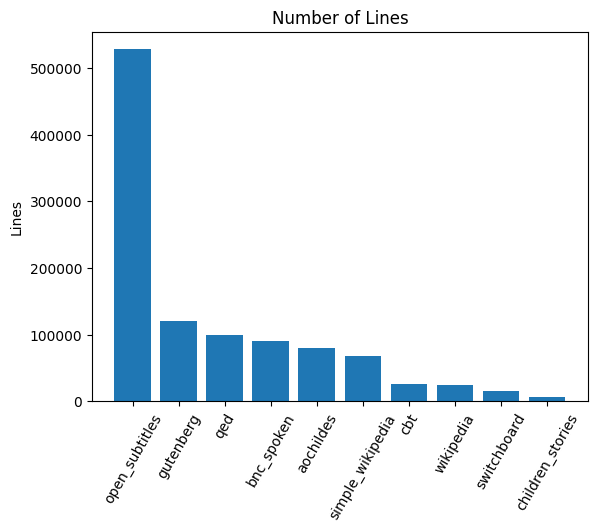

In [58]:
sorted_file_lines = sorted(line_counts.items(), key=lambda x: x[1], reverse=True)

filenames = [item[0].split('/')[-1].split('.')[0] for item in sorted_file_lines]
lengths = [item[1] for item in sorted_file_lines]

plt.bar(filenames, lengths)
# plt.xlabel('Training Set')
plt.ylabel('Lines')
plt.title('Number of Instances')
plt.xticks(rotation=60) 
plt.show()

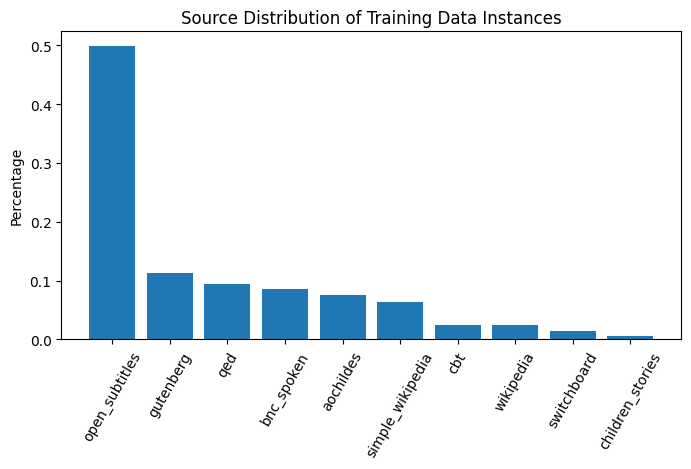

In [64]:
sorted_file_lines = sorted(line_counts.items(), key=lambda x: x[1], reverse=True)

total_length = sum(line_counts.values())

filenames = [item[0].split('/')[-1].split('.')[0] for item in sorted_file_lines]
lengths = [item[1] / total_length for item in sorted_file_lines]

plt.figure(figsize=(8, 4))

plt.bar(filenames, lengths)
# plt.xlabel('Training Set')
plt.ylabel('Percentage')
plt.title('Source Distribution of Training Data Instances')
plt.xticks(rotation=60) 
plt.show()

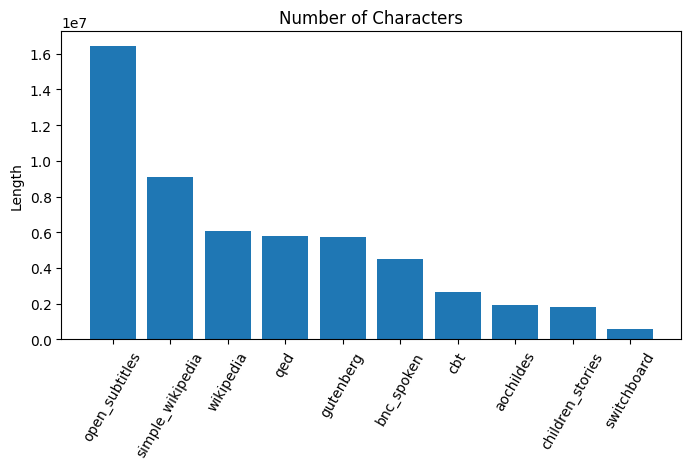

In [59]:
sorted_file_lengths = sorted(char_counts.items(), key=lambda x: x[1], reverse=True)

filenames = [item[0].split('/')[-1].split('.')[0] for item in sorted_file_lengths]
lengths = [item[1] for item in sorted_file_lengths]

plt.figure(figsize=(8, 4))

plt.bar(filenames, lengths)
# plt.xlabel('Training Set')
plt.ylabel('Length')
plt.title('Number of Characters')
plt.xticks(rotation=60)  
# plt.show()

plt.savefig('charsperset.png', dpi=300)

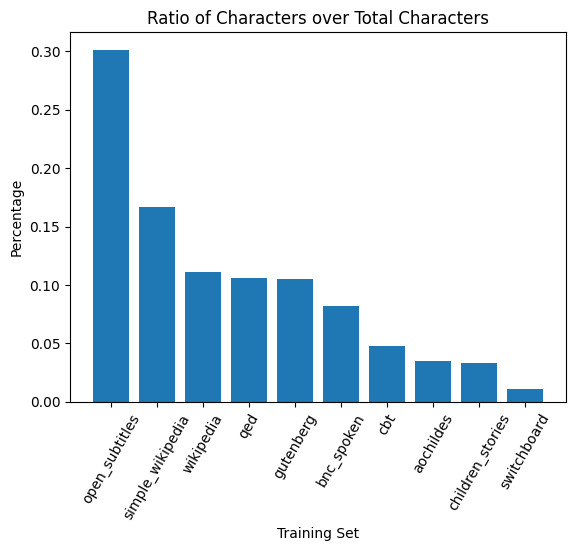

In [46]:
sorted_file_lengths = sorted(char_counts.items(), key=lambda x: x[1], reverse=True)

total_length = sum(char_counts.values())

filenames = [item[0].split('/')[-1].split('.')[0] for item in sorted_file_lengths]
lengths = [item[1] / total_length for item in sorted_file_lengths]

plt.bar(filenames, lengths)
plt.xlabel('Training Set')
plt.ylabel('Percentage')
plt.title('Ratio of Characters over Total Characters')
plt.xticks(rotation=60)  
plt.show()

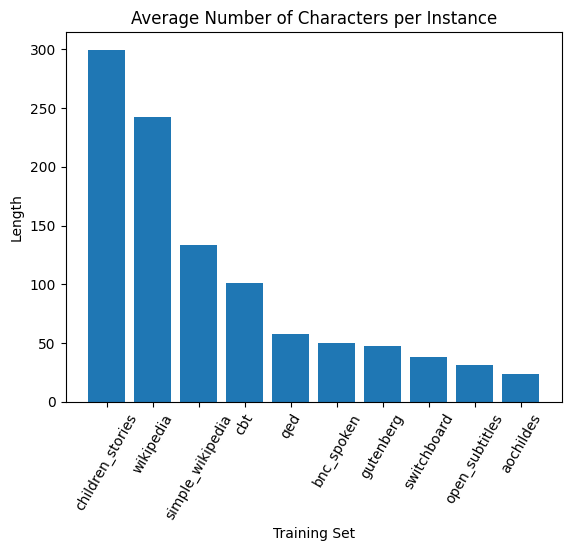

In [53]:
mean_text_length = {k: v / line_counts[k] for k, v in char_counts.items()}
mean_text_length = sorted(mean_text_length.items(), key=lambda x: x[1], reverse=True)

filenames = [item[0].split('/')[-1].split('.')[0] for item in mean_text_length]
lengths = [item[1] for item in mean_text_length]

plt.bar(filenames, lengths)
plt.xlabel('Training Set')
plt.ylabel('Length')
plt.title('Average Number of Characters per Instance')
plt.xticks(rotation=60)  
plt.show()

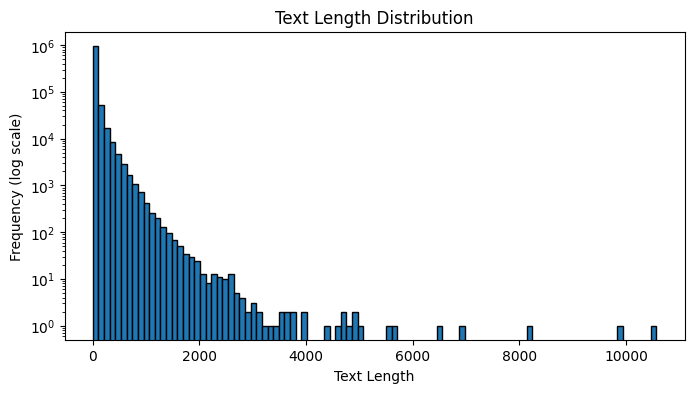

In [57]:
text_lengths = df['text'].str.len()

plt.figure(figsize=(8, 4))

plt.hist(text_lengths, bins=100, edgecolor='black')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('Text Length')
plt.ylabel('Frequency (log scale)')
plt.title('Text Length Distribution')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a dataframe named 'df' with a 'text' column containing the text data

# Initialize the CountVectorizer with the desired options
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer on the text data
X = vectorizer.fit_transform(df['text'])

In [37]:

# Get the feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

# Get the sum of counts for each bigram
bigram_counts = X.sum(axis=0)

# Sort the bigrams based on their counts
sorted_bigrams = sorted(zip(feature_names, bigram_counts.tolist()[0]), key=lambda x: x[1], reverse=True)

# Print the top 10 most co-occurring bigrams
top_n = 20
for bigram, count in sorted_bigrams[:top_n]:
    print(bigram, count)


of the 51682
in the 46886
to the 21778
on the 18007
you re 15727
and the 15543
to be 13898
at the 13266
it was 13220
it is 12706
you know 12624
for the 11674
do you 11285
he was 10676
are you 9820
this is 9683
with the 9402
is the 8964
going to 8802
from the 8701


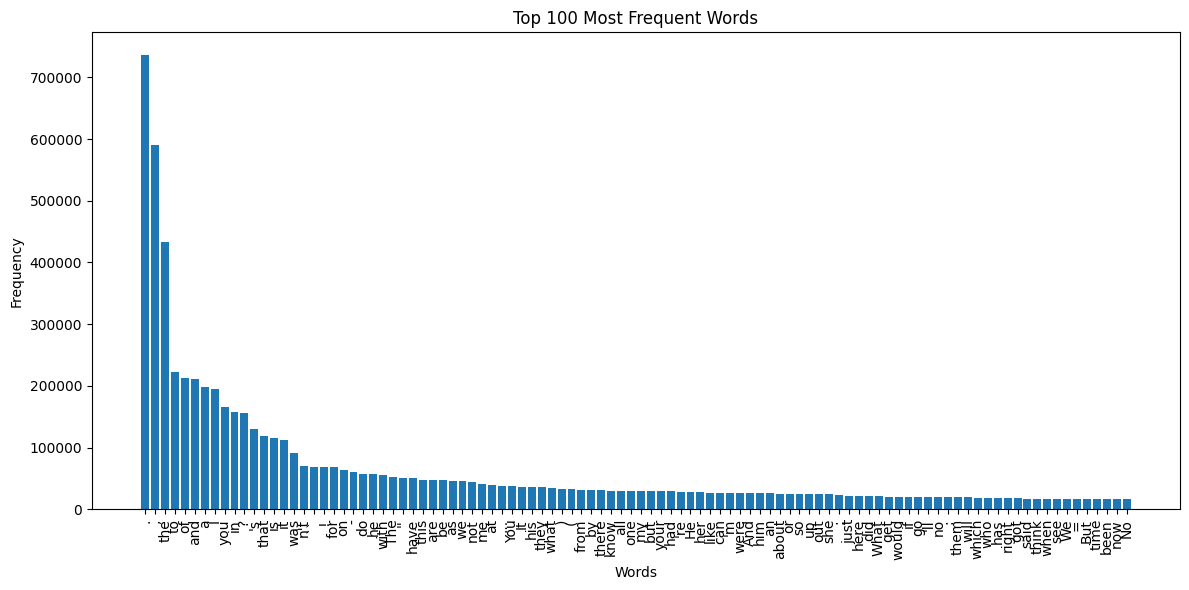

In [38]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'df' with a 'text' column containing the text data

# Combine all the text into a single string
text_combined = ' '.join(df['text'])

# Tokenize the text into individual words
words = nltk.word_tokenize(text_combined)

# Create a frequency distribution of the words
freq_dist = FreqDist(words)

# Select the top 100 most frequent words
top_n = 100
top_words = freq_dist.most_common(top_n)

# Extract the word and frequency information
words, frequencies = zip(*top_words)

# Plot the word frequencies
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 100 Most Frequent Words')
plt.tight_layout()
plt.show()


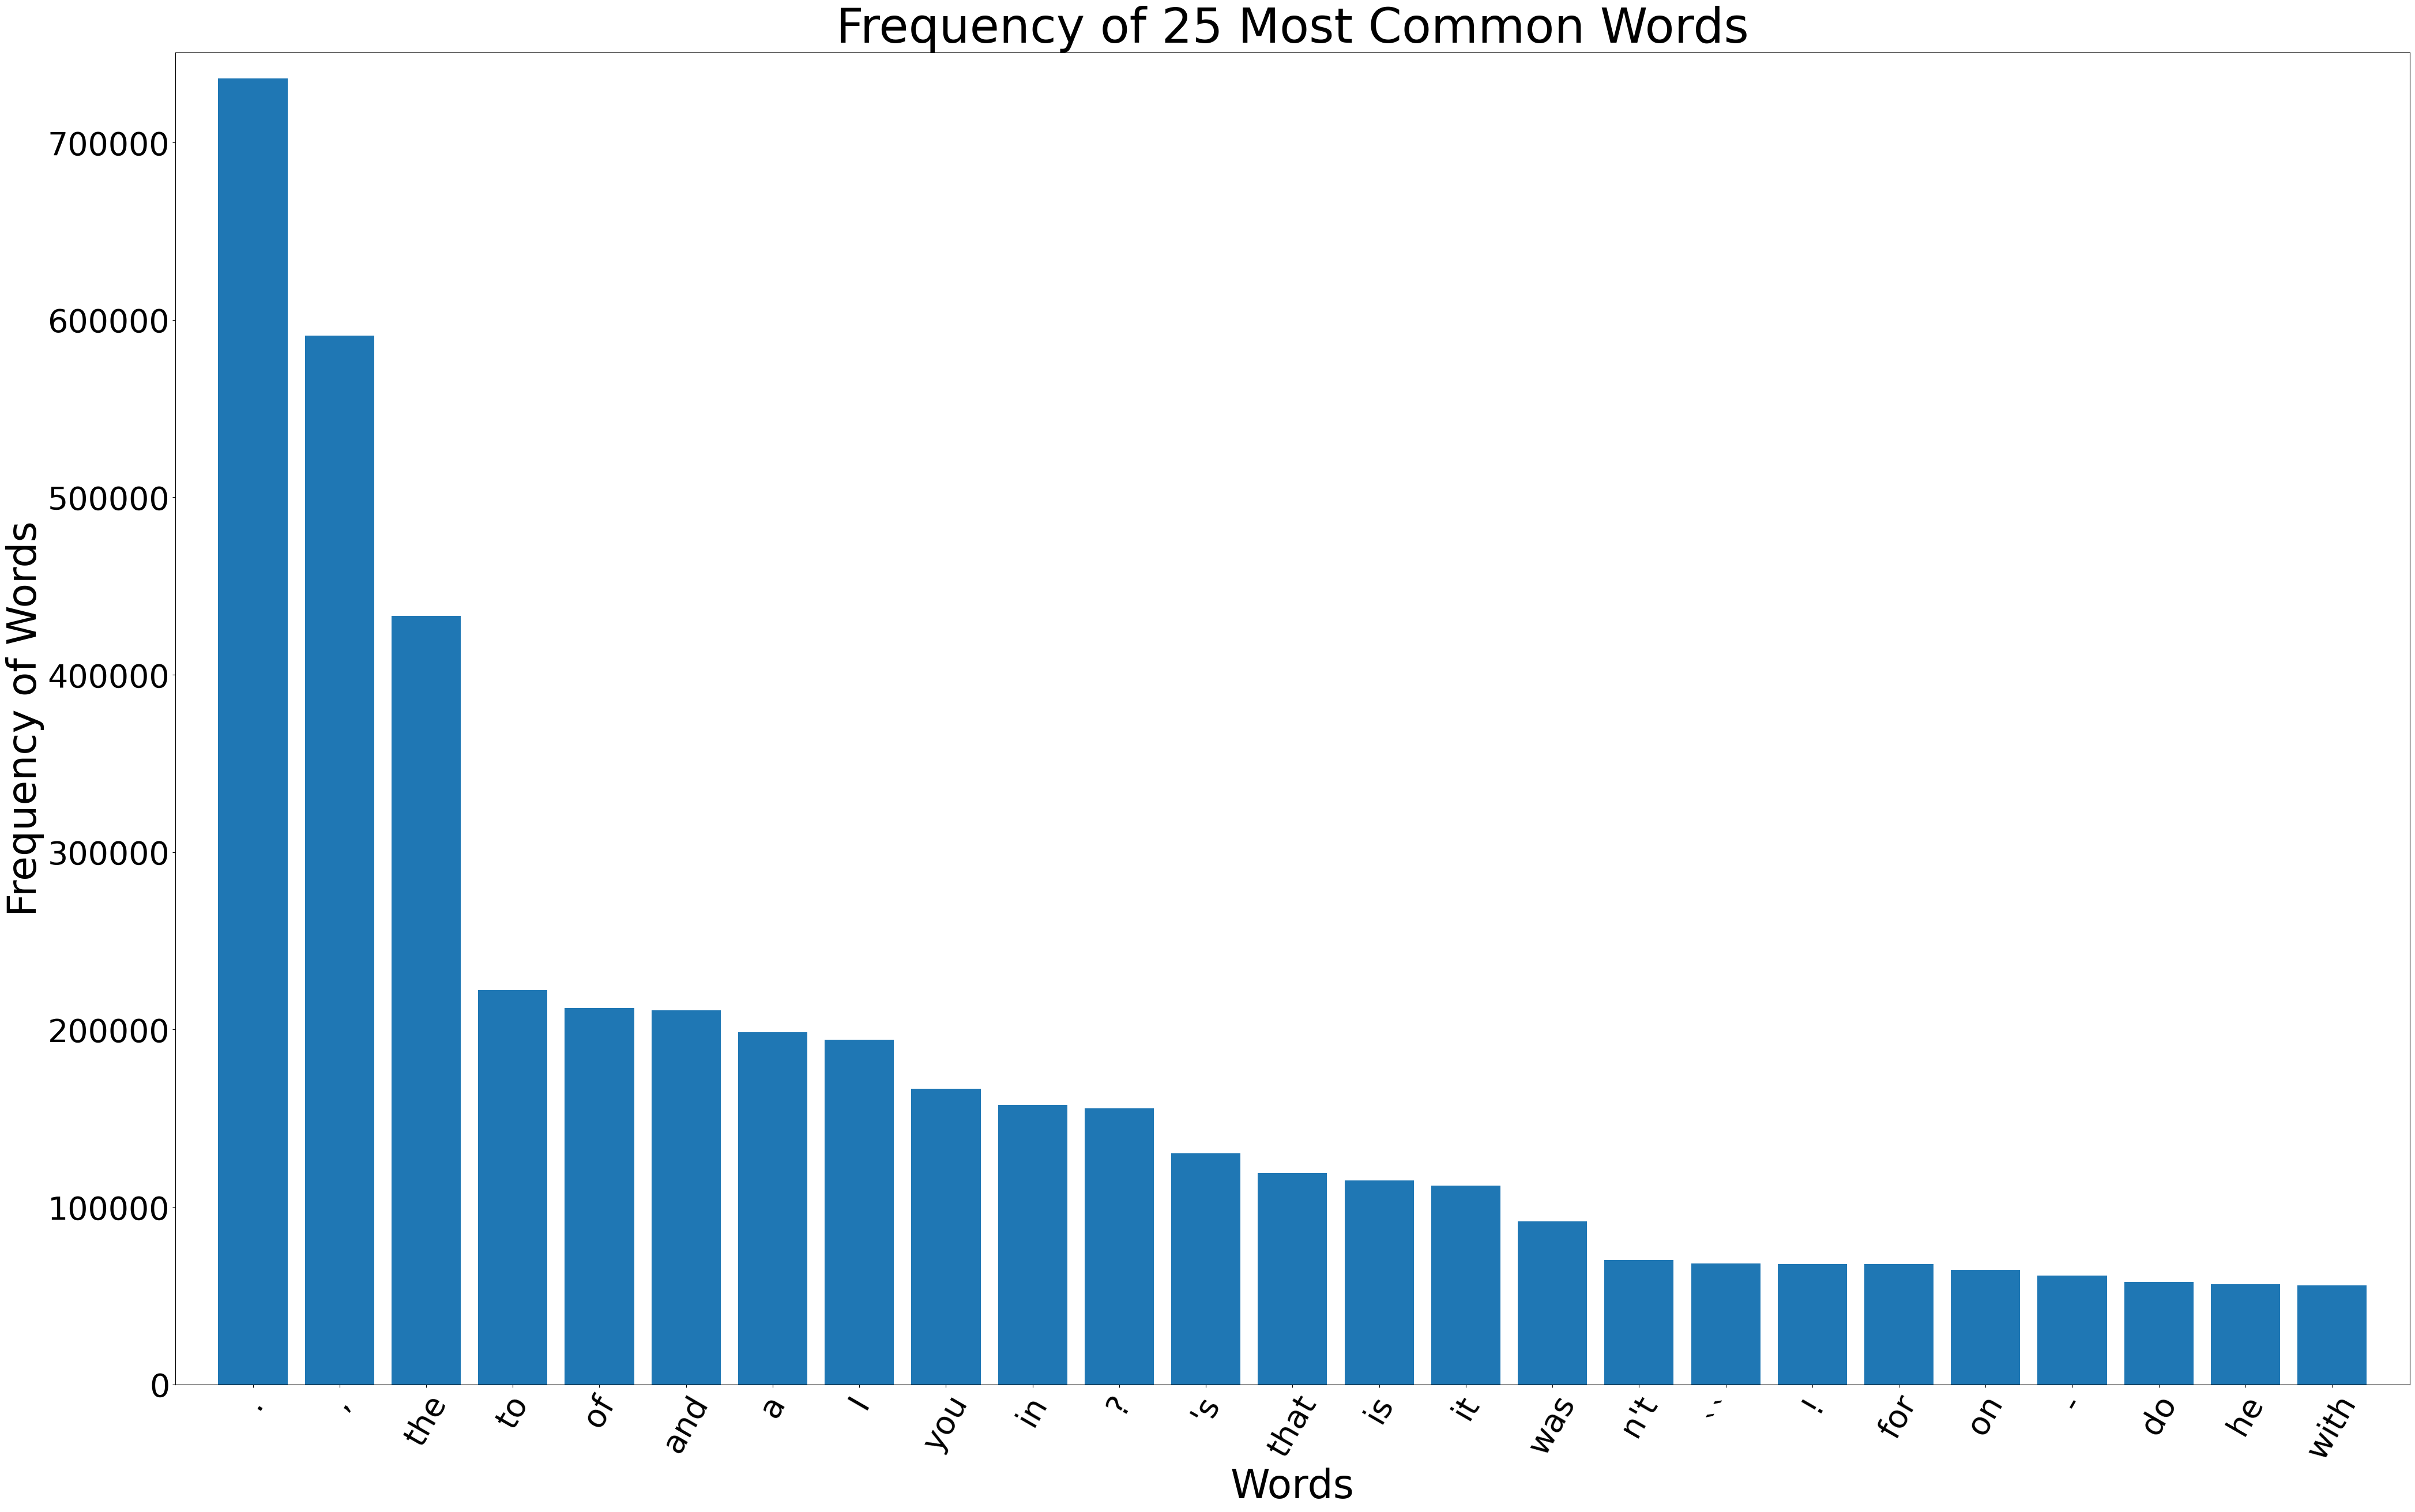

In [40]:
mostcommon_small = freq_dist.most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [42]:
import re

# Assuming you have a dataframe named 'df' with a 'text' column containing the text data

# Regular expressions for email addresses, IP addresses, and secret keys
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
ip_regex = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'

# Check for PII in each text entry
pii_found = []
for text in df['text']:
    # Search for emails
    emails = re.findall(email_regex, text)
    
    # Search for IP addresses
    ips = re.findall(ip_regex, text)
        
    # Add the found PII to the list
    if emails or ips:
        pii_found.append({
            'Text': text,
            'Emails': emails,
            'IP Addresses': ips,
        })

# Print the entries with found PII
for entry in pii_found:
    print('Text:', entry['Text'])
    if entry['Emails']:
        print('Emails:', entry['Emails'])
    if entry['IP Addresses']:
        print('IP Addresses:', entry['IP Addresses'])
    print('---')


Text: Repair and Synchronization by Easy Subtitles Synchronizer 1.0.0.0

IP Addresses: ['1.0.0.0']
---
Text: /supplied by CoBeR coberus@go2.pl

Emails: ['coberus@go2.pl']
---
Text: Email subtitling@bbc.co.uk

Emails: ['subtitling@bbc.co.uk']
---
Text: Ripped with SubRip 1.13 and Verified by CdinT (Cristi_Polacsek@SoftHome.net)

Emails: ['Cristi_Polacsek@SoftHome.net']
---
Text: Contact: semm@univ-lille1.fr 

Emails: ['semm@univ-lille1.fr']
---
Text: Martin@tvfraenandenplanet.dk and if you sit at home and think "wish it was me who was alien" then you may very well be 

Emails: ['Martin@tvfraenandenplanet.dk']
---
Text: If you guys want more information, you can always email me at james@arff.org 

Emails: ['james@arff.org']
---
Text: If you enjoyed my subtitle work, drop me a line at elee@simplymenu.com 

Emails: ['elee@simplymenu.com']
---
Text: Make your request to elee@simplymenu.com 

Emails: ['elee@simplymenu.com']
---
Text: Once again if you have any questions, please feel free to 

In [ ]:
import re

In [43]:
text_combined = ' '.join(df['text'])

alphanumeric_count = len(re.findall(r'\w', text_combined))

total_count = len(text_combined)

percentage_alphanumeric = (alphanumeric_count / total_count) * 100

print(f"Percentage of alphanumeric characters: {percentage_alphanumeric:.2f}%")


Percentage of alphanumeric characters: 75.13%


In [45]:
text_combined = ' '.join(df['text'])

whitespace_count = len(re.findall(r'\s', text_combined))

total_count = len(text_combined)

print(f"Percentage of whitespace characters: {(whitespace_count / total_count) * 100:.2f}%")


Percentage of whitespace characters: 20.31%


In [47]:
non_alphanumeric_whitespace_chars = re.findall(r'[^\w\s]', text_combined)

unique_chars = set(non_alphanumeric_whitespace_chars)

print(f"Unique non-alphanumeric/non-whitespace characters: {unique_chars}")
print(f"Percentage of non-alphanumeric/non-whitespace characters: {(len(non_alphanumeric_whitespace_chars) / total_count) * 100:.2f}%")



Unique non-alphanumeric/non-whitespace characters: {'『', '্', '\x80', '♪', '−', 'ꯣ', '์', '$', '்', '≥', 'ْ', '̧', '°', 'ा', '⬄', 'ָ', 'ം', '♬', 'ੰ', '！', '{', '्', 'ং', '⁻', '》', '–', '§', '☆', ')', '℞', '\\', '⟩', 'ෙ', 'ู', '¸', 'ो', 'ं', '\u200e', ';', '″', '"', 'ٓ', '̄', '.', 'ੇ', '‑', 'ु', '⊆', 'ೀ', '\x94', '《', '್', '?', '\x91', '˚', '়', '\u200b', '？', 'ّ', '£', 'ً', '€', '\x92', '♫', 'ৃ', '→', 'ׁ', '♥', '%', 'ુ', '′', 'े', 'ُ', 'ু', '¨', '>', '≈', '/', 'ূ', '№', '∼', 'ꯨ', '-', '़', '„', 'ꯦ', 'َ', '』', '™', '۟', 'ि', 'ാ', '」', "'", 'ꯧ', 'ੀ', '♦', '́', 'ी', '}', '）', '¬', 'ꯤ', '\u200f', '¯', '~', '・', '∞', '*', '⿱', '「', '»', '‘', 'ા', '。', '（', 'ः', '÷', '่', 'ে', '¤', '(', '\x7f', '!', 'ू', 'ಾ', 'ා', '₦', '̍', 'ৈ', '·', '້', '`', '⁺', '\x89', '|', '=', '່', '،', '√', '℥', 'ਂ', 'ิ', '₤', '×', 'ꯩ', '∈', 'ી', '⌀', 'ி', '¡', '©', '\xad', '˜', '︢', 'ਾ', '₹', '@', '⋅', '…', '\x86', 'া', '\u200c', '”', ']', '�', '\x9d', '[', '•', '⿰', 'ِ', '&', '«', 'ী', '～', '，', '̨', 'ٰ', '★', '≤', 

More ideas:

- We anonymize the data by removing any Personal Identifiable Information (PII), including emails, IP addresses, and secret keys.
- We use a number of heuristics to detect and remove auto-generated code.
- For a subset of languages, we remove code that doesn't compile or is not parseable using standard syntax parsers.
- We filter out files based on average line length, maximum line length, and percentage of alphanumeric characters.

From https://blog.replit.com/llm-training